## Final Project Submission

Please fill out:
* Student name: **Pride Amos**
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: William Okomba
* Blog post URL:


# Business Understanding

## *Business Understanding Overview*

This is a project for a real estate agency:Alliance Realtors that helps homeowners buy and/or sell homes.We saw the need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

## *Business Objectives*

This study is commisioned with the following objectives:
 * Improve buying and selling of renovated houses by making better recommendations
 * Increase value of renovated homes and provide recommendations and by what amount
 
The study will be judged a success if:
 * Home-sales increase by 10%.
 * Renovated homes increase in value.
 * The study finishes on time and under budget.

## Data Understanding

#### Loading the data

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [79]:
house_df = pd.read_csv('data/kc_house_data.csv')
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


   * Finding the shape of the data
   * The columns names
   * The data types
   * The unique values
   * Description of the data
   * The null values

In [48]:
#names of columns


house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [49]:
# checking for the data types


house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [50]:
# checking for rows and columns

house_df.shape

(21597, 21)

In [51]:
# Description of the data

house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [52]:
# Checking for null values

house_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Year renovated and waterfront columns had many null values

In [53]:
# checking for duplicates
house_df.duplicated().sum()

0

In [54]:
# checking for correlation

house_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


In [55]:
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

### *Data description report*

There are many records and attributes to process in a real estate agency.

Data Quantity:

   * The loaded data was in csv format
   * The data set has 21597 rows and 21 columns

Data Quality:
   * There were columns with notable characterisics for the study
   * The data types were:float64(6), int64(9), object(6)
   * There were null values in the yr_renovated and waterfront columns
   * There were no duplicated values

## Data Cleaning

In [60]:
def missing_values(data):
    miss_val = house_df.isna().sum().sort_values(ascending = False)
    
    # percentages of missing values
    percentage = (house_df.isna().sum() / len(data)).sort_values(ascending = False)
    
    #creating a dataframe for the missing
    missing_df = pd.DataFrame({"Total Missing Values": miss_val,"percentages(%)": percentage})
    
    # if percentage == 0 implies no missing values
    missing_df.drop(missing_df[missing_df["percentages(%)"] ==0].index, inplace=True)
    
    return missing_df

In [61]:
missing_values(house_df)

,Total Missing Values,percentages(%)
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917


Having a close look at the columns with missing values

The view column has few null values dropping the null values would  not be appropriate.Hence i replaced with missing because it is a categorical data

In [69]:
house_df['view'].fillna('Missing', inplace=True)

The other null values from yr_renovated and waterfront are many so i decided to drop the null values

In [72]:
house_df.dropna(inplace=True)

In [73]:
house_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Finding the outliers

In [81]:
def find_outliers_IQR(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    return outliers

In [82]:
outliers = find_outliers_IQR(house_df)

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 21597
max outlier value: id                     NaN
date                  None
price            7700000.0
bedrooms              33.0
bathrooms              8.0
sqft_living        13540.0
sqft_lot         1651359.0
floors                 NaN
waterfront            None
view                  None
condition             None
grade                 None
sqft_above          9410.0
sqft_basement         None
yr_built               NaN
yr_renovated        2015.0
zipcode                NaN
lat                47.1593
long              -121.315
sqft_living15       6210.0
sqft_lot15        871200.0
dtype: object
min outlier value: id                     NaN
date                  None
price            1130000.0
bedrooms               1.0
bathrooms              0.5
sqft_living         4240.0
sqft_lot           19163.0
floors                 NaN
waterfront            None
view                  None
condition             None
grade                 None
sqft_above          3745.0
sqft

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1991.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

### Univariate

#### (a).Numerical

In [87]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

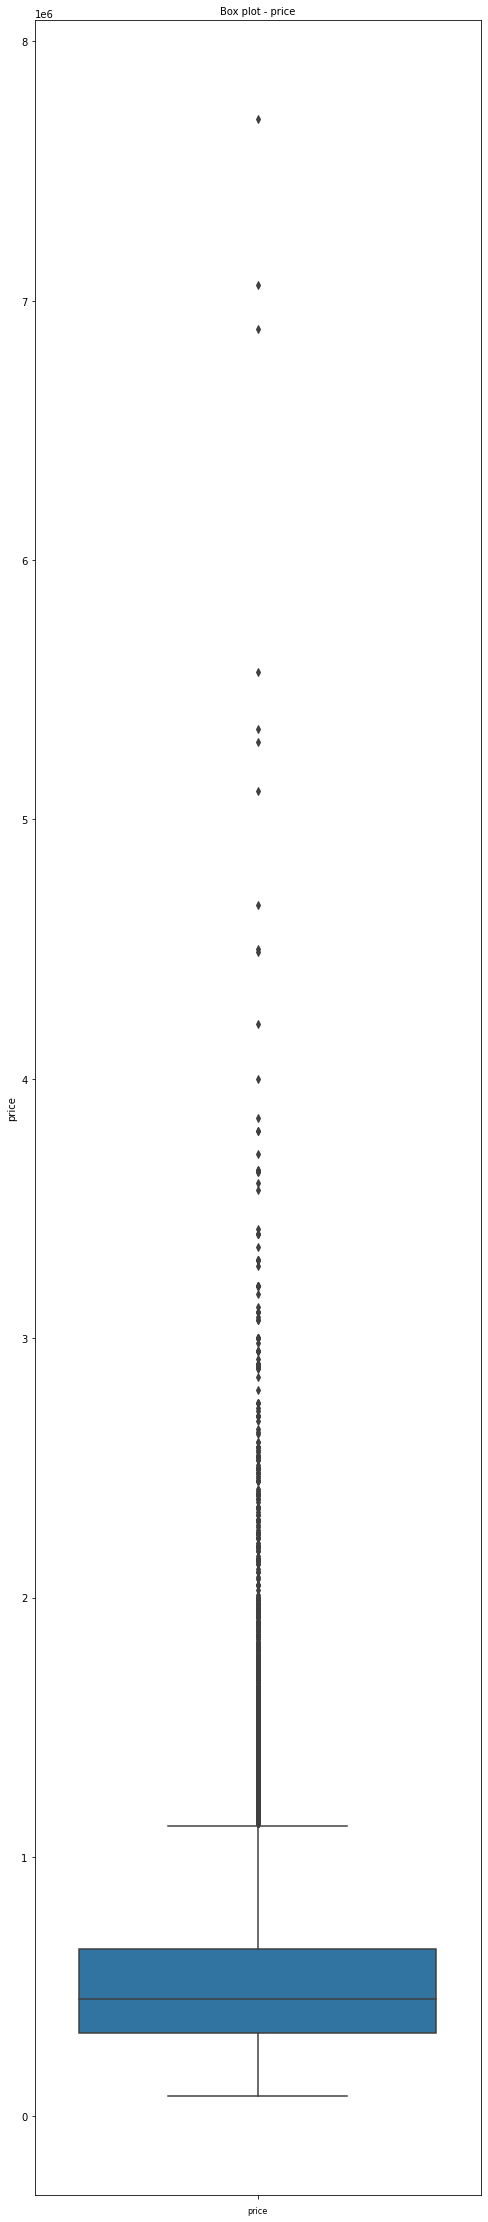

In [92]:
col_names = ['price']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = house_df[col_val], ax= ax)
  ax.set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax.set_xlabel(col_val, fontsize= 8)
plt.show()

# From the boxplots below it can be seen that there are a lot of outliers.

In [94]:
# Checking for Outliers

Q1_prices = house_df['price'].quantile(.25)
Q3_prices = house_df['price'].quantile(.75)

IQR_prices = Q3_prices - Q1_prices


anomalies = house_df[(house_df.price < Q1_prices - 1.5* IQR_prices)  |
                    (house_df.price > Q3_prices + 1.5 * IQR_prices) ]
print('Price outliers are: ' + str(anomalies.price.count()))

Price outliers are: 1158


From the above, the outliers are too many to remove as this will affect the accuracy of the data analysis, and the result could be inconclusive and/or incorrect.

#### (b).Categorical

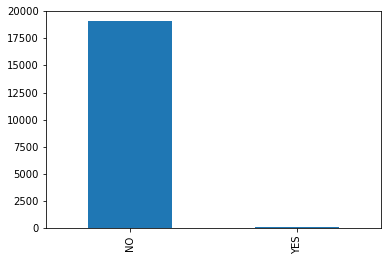

In [109]:
# Records of the waterfront (yes or no)

house_df.waterfront.value_counts().plot.bar();

The NO contains the majority of the data, suggesting most of the houses lack waterfronts. Due to this, we'll be using the NO for our analysis. during the hypothesis testing. Furthermore, since we'll be using the z-score, the larger the data, the more accurate the results will be.

### (c).Summary Statistics

In [119]:
# central tendencies

# mean
print('The mean of price: ' +str(house_df.price.mean()))
# median
print('The median of price: ' +str(house_df.price.median()))
# mode
print('The mode of price: ' +str(house_df.price.mode()))
# range
print('The range of price: ' +str(house_df.price.max() - house_df.price.min()))
# standard deviation
print('The standard deviation of price: ' +str(house_df.price.std()))
# Variance
print('The variance of price: ' +str(house_df.price.var()))
# quantiles
print('The quantiles of price: \n' +str(house_df.price.quantile([0.25,0.5,0.75])))
# Skewness
print('The skewness of price: ' +str(house_df.price.skew()))
# kurtosis
print('The kurtosis of price: ' +str(house_df.price.kurt()))

The mean of price: 540296.5735055795
The median of price: 450000.0
The mode of price: 0    350000.0
1    450000.0
Name: price, dtype: float64
The range of price: 7622000.0
The standard deviation of price: 367368.1401013936
The variance of price: 134959350361.55716
The quantiles of price: 
0.25    322000.0
0.50    450000.0
0.75    645000.0
Name: price, dtype: float64
The skewness of price: 4.023364652271239
The kurtosis of price: 34.54135857673376


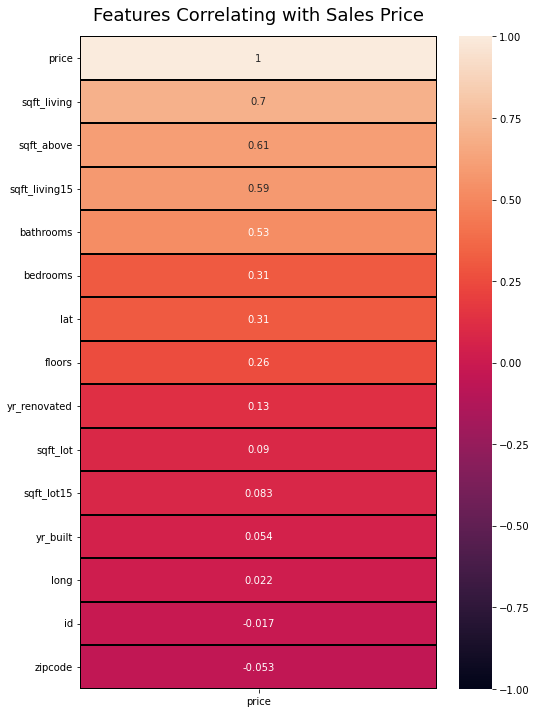

In [107]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(
    house_df.corr()[['price']].sort_values(by='price',ascending=False),
    vmin=-1, vmax=1, annot=True,linewidths=2, linecolor='black')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

C:\Users\hp\AppData\Local\Temp\ipykernel_5424\3393931701.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df["price"]);


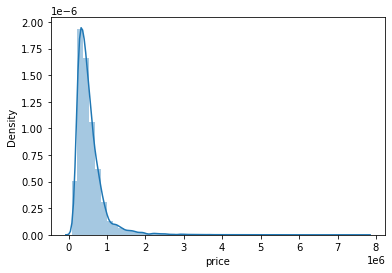

In [125]:
# Plotting Histogram to show the above

sns.distplot(house_df["price"]);

## Bivariate